# CAPSTONE PROJECT-4 :- PRCP-1020-HousePricePred
# PROJECT TEAM ID :- PTID-CDS-MAY-24-1919

##  Business Case: Predicting House Prices
1. Introduction


The real estate market is highly dynamic, and accurately predicting house prices is crucial for real estate agents, investors, and home buyers. Traditional methods of pricing based on historical data and manual appraisals can be time-consuming and often inaccurate. By leveraging advanced machine learning techniques like Support Vector Regression (SVR), we can enhance the accuracy of house price predictions, enabling better decision-making and competitive advantage.


2. Objective


The primary objective is to develop a predictive model using SVR to accurately estimate the selling prices of houses based on various features such as location, size, amenities, and other property characteristics. This model aims to:

Provide real estate agents with precise pricing suggestions.
Assist home buyers and sellers in making informed decisions.
Help investors identify undervalued properties for investment.

3. Challenges

Data Complexity: The real estate market involves numerous variables and non-linear relationships between features and house prices.
Market Variability: Prices can vary significantly based on macroeconomic factors, local market conditions, and property-specific features.
Feature Engineering: Identifying and transforming relevant features is crucial for model accuracy.

4. Solution

Implementing an SVR model can address these challenges due to its robustness in handling non-linear relationships and high-dimensional data. The steps include:

Data Collection: Gather historical data on house prices and features.
Data Preprocessing: Clean the data, handle missing values, and perform feature engineering.
Model Development: Train an SVR model using historical data to learn the relationship between features and prices.
Model Validation: Evaluate the model's performance using cross-validation and metrics such as Mean Squared Error (MSE) and R-squared.


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
# import data
data = pd.read_csv("C:\\Users\\nikki\\Downloads\\house price prediction.csv")

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.shape

(1460, 81)

<Axes: >

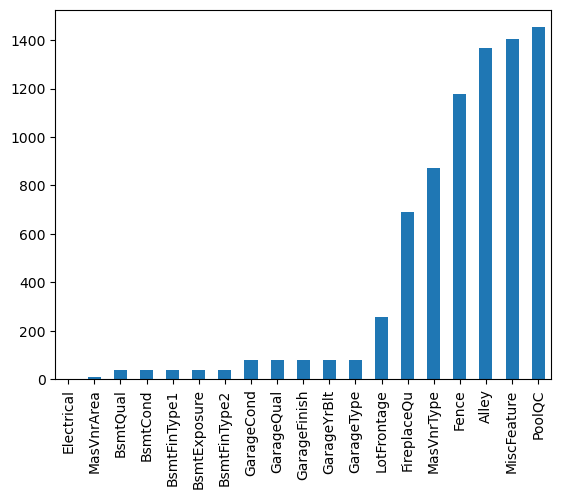

In [7]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# Histogram

In [8]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\nikki\AppData\Local\Temp\ipykernel_2640\3174035351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'],kde=True,bins = 20);


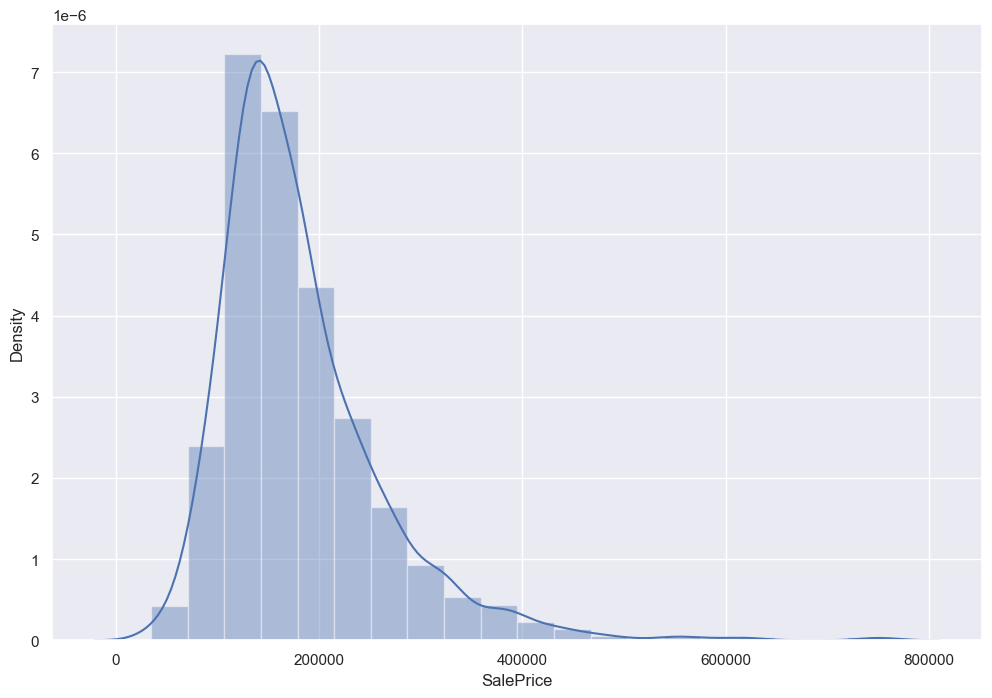

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],kde=True,bins = 20);

<Axes: xlabel='SalePrice', ylabel='Density'>

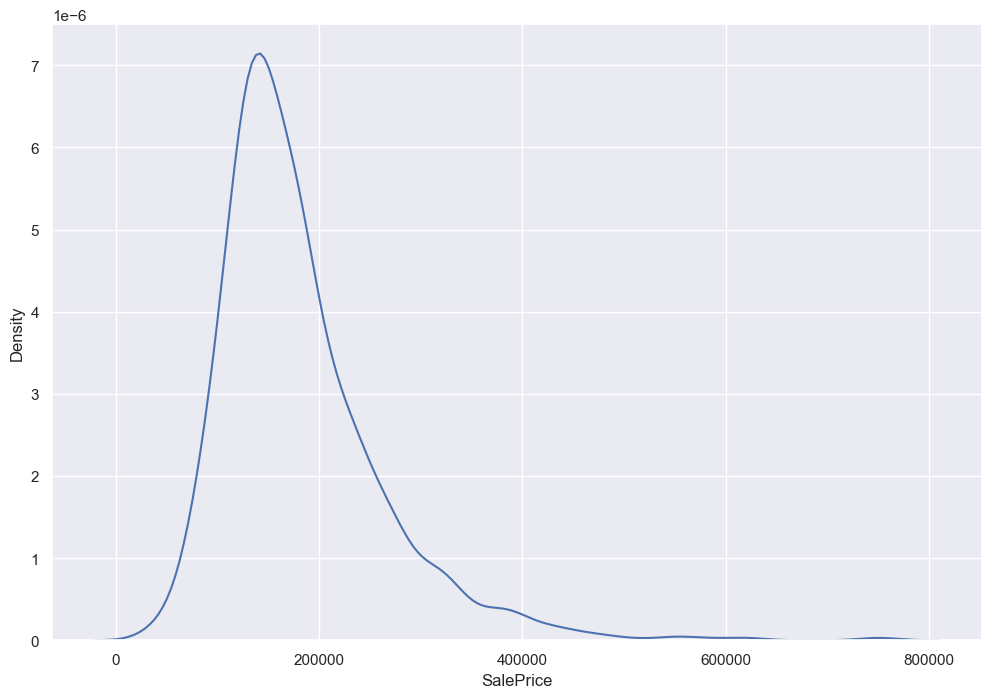

In [10]:
sns.kdeplot(data['SalePrice'])

In [11]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Correlation

In [12]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# Assuming 'data' is your DataFrame
categorical_features = data.select_dtypes(include=['object', 'category'])
print(categorical_features.columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False))


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'correlation of Numeric features  with sale price'}>

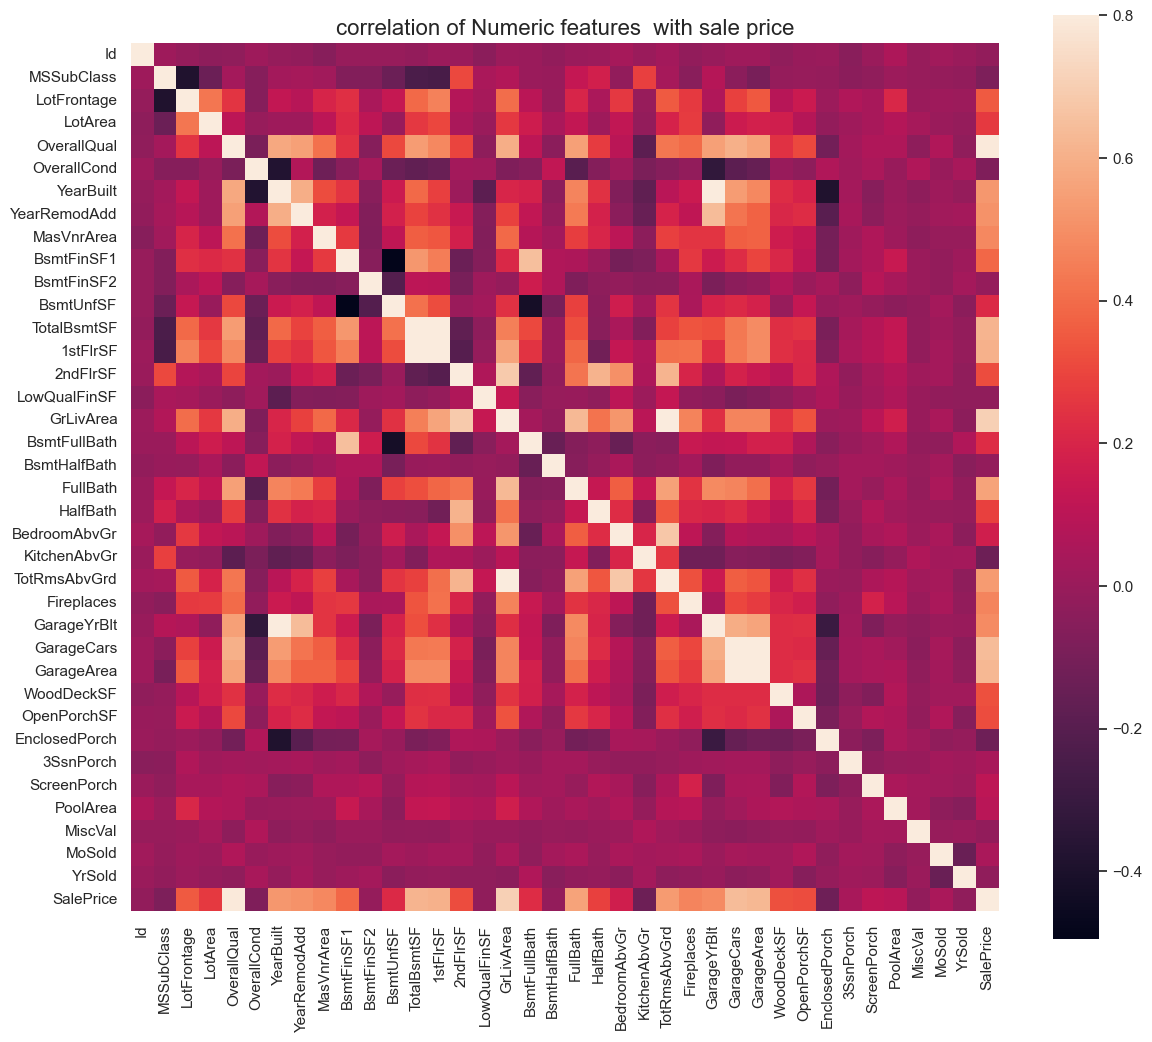

In [15]:
ax = plt.subplots(figsize = (14,12))
plt.title("correlation of Numeric features  with sale price",y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


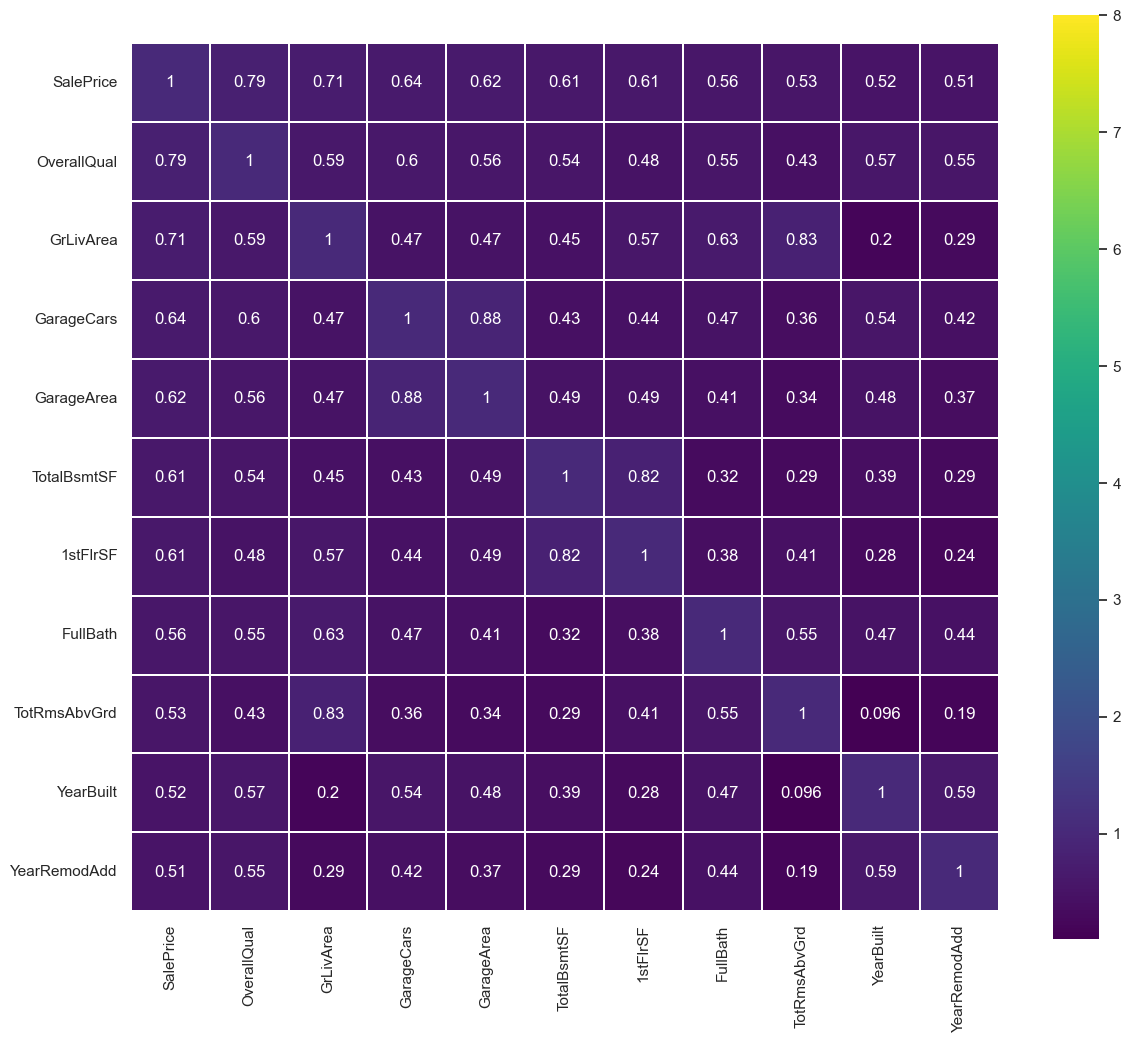

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `correlation` and `data` are already defined DataFrames and 'SalePrice' is one of the columns in `correlation`
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)

cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(14, 12))  # Corrected to plt.subplots
sns.heatmap(cm, vmax=8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor='white', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

plt.show()


<Axes: xlabel='GarageCars', ylabel='SalePrice'>

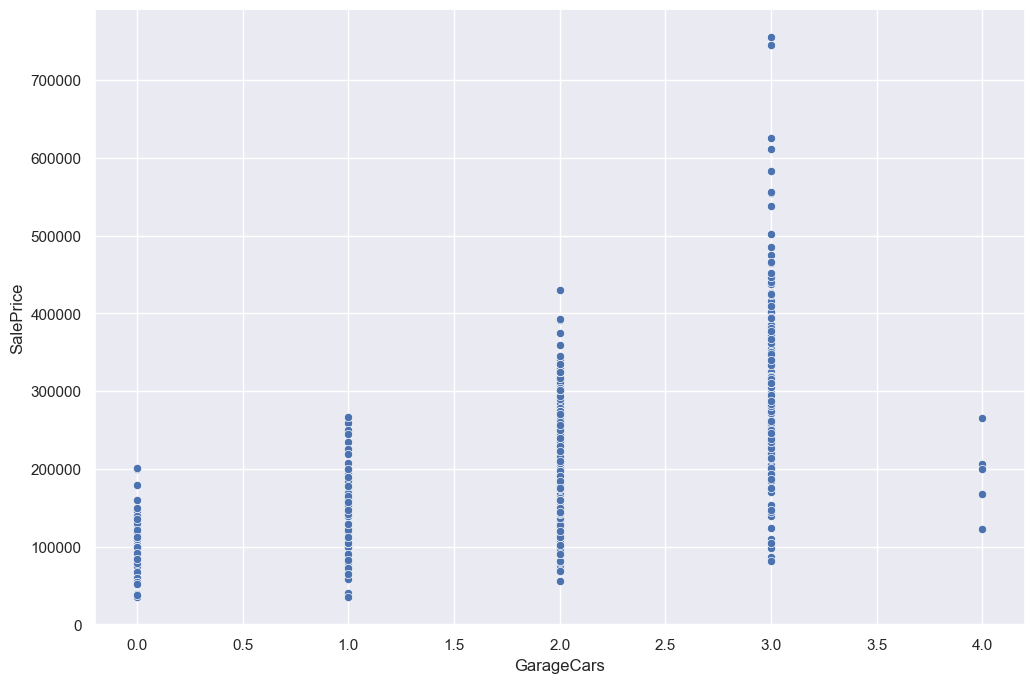

In [17]:
sns.scatterplot(x='GarageCars',y = 'SalePrice' , data = data)

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

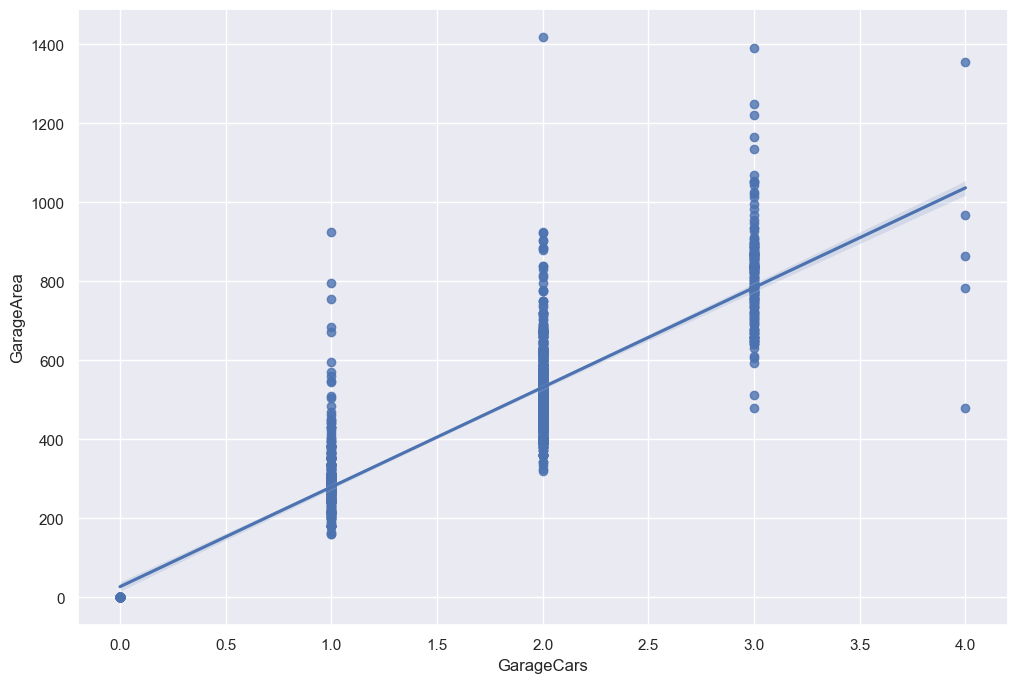

In [18]:
sns.regplot (x= 'GarageCars' , y='GarageArea', data = data,scatter= True,fit_reg = True)

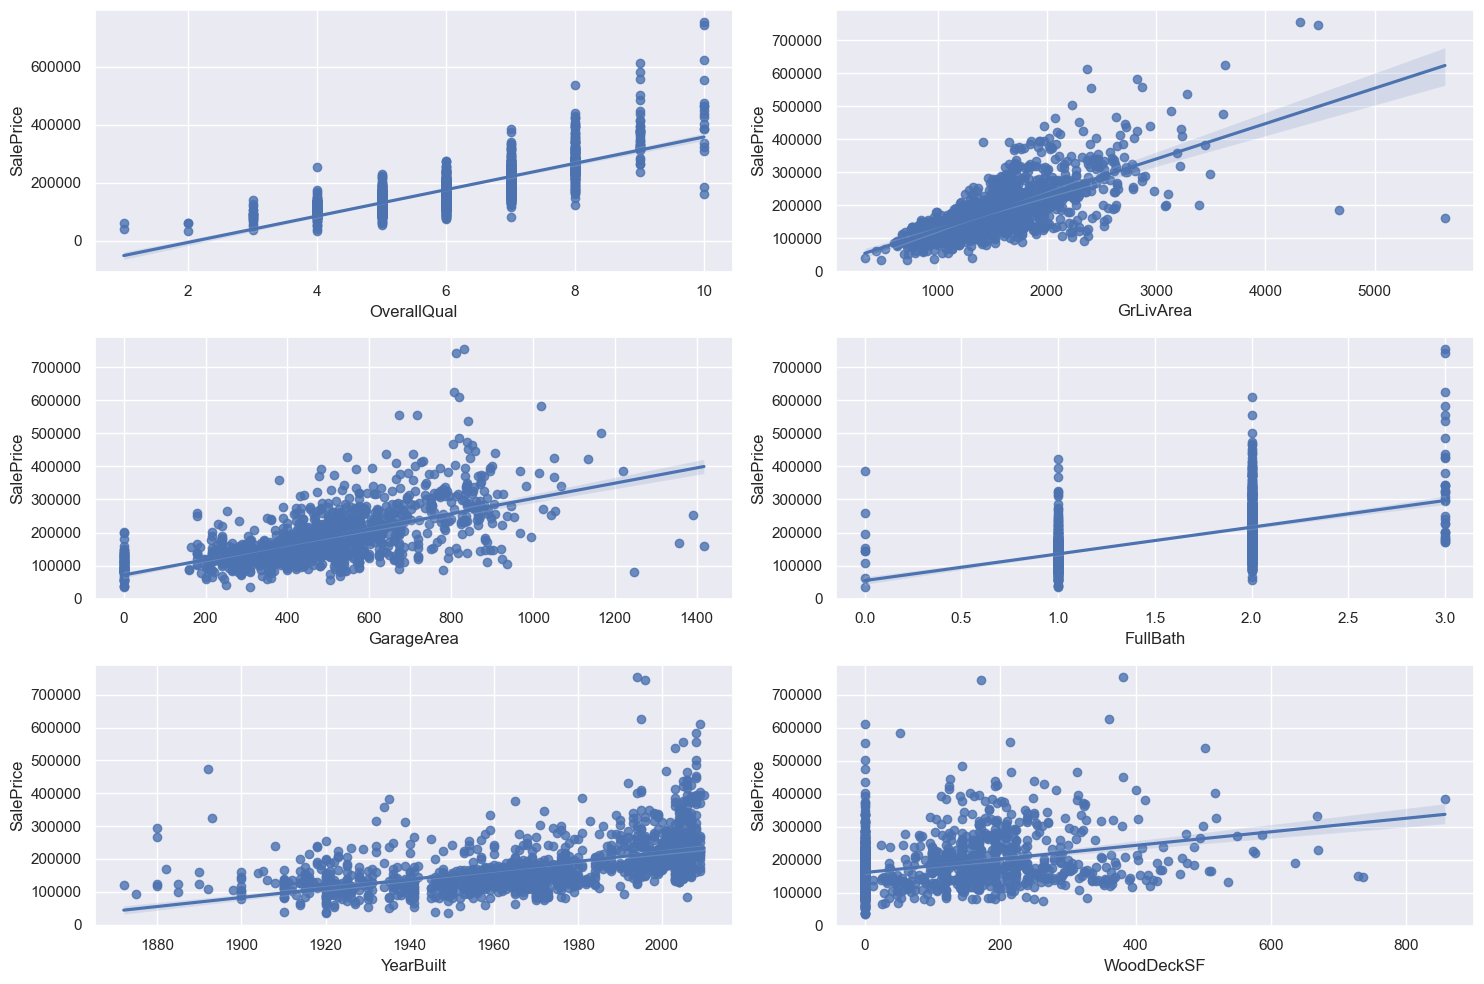

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes using subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot the regressions
sns.regplot(x='OverallQual', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x='FullBath', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax4)
sns.regplot(x='YearBuilt', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax5)
sns.regplot(x='WoodDeckSF', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax6)

# Adjust the layout
plt.tight_layout()
plt.show()


<Axes: xlabel='SalePrice'>

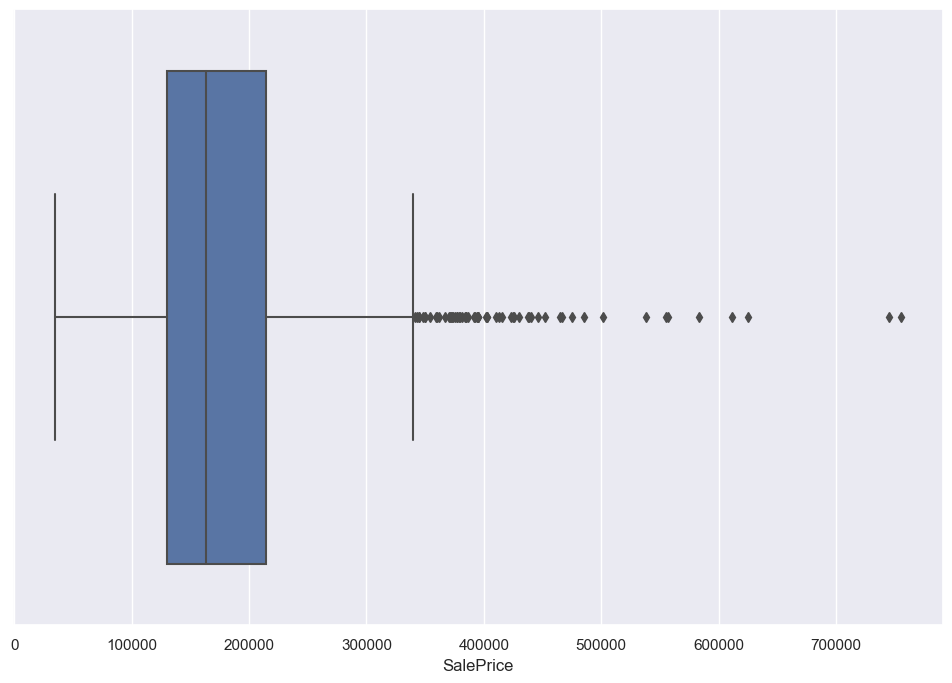

In [20]:
sns.boxplot(x=data["SalePrice"])

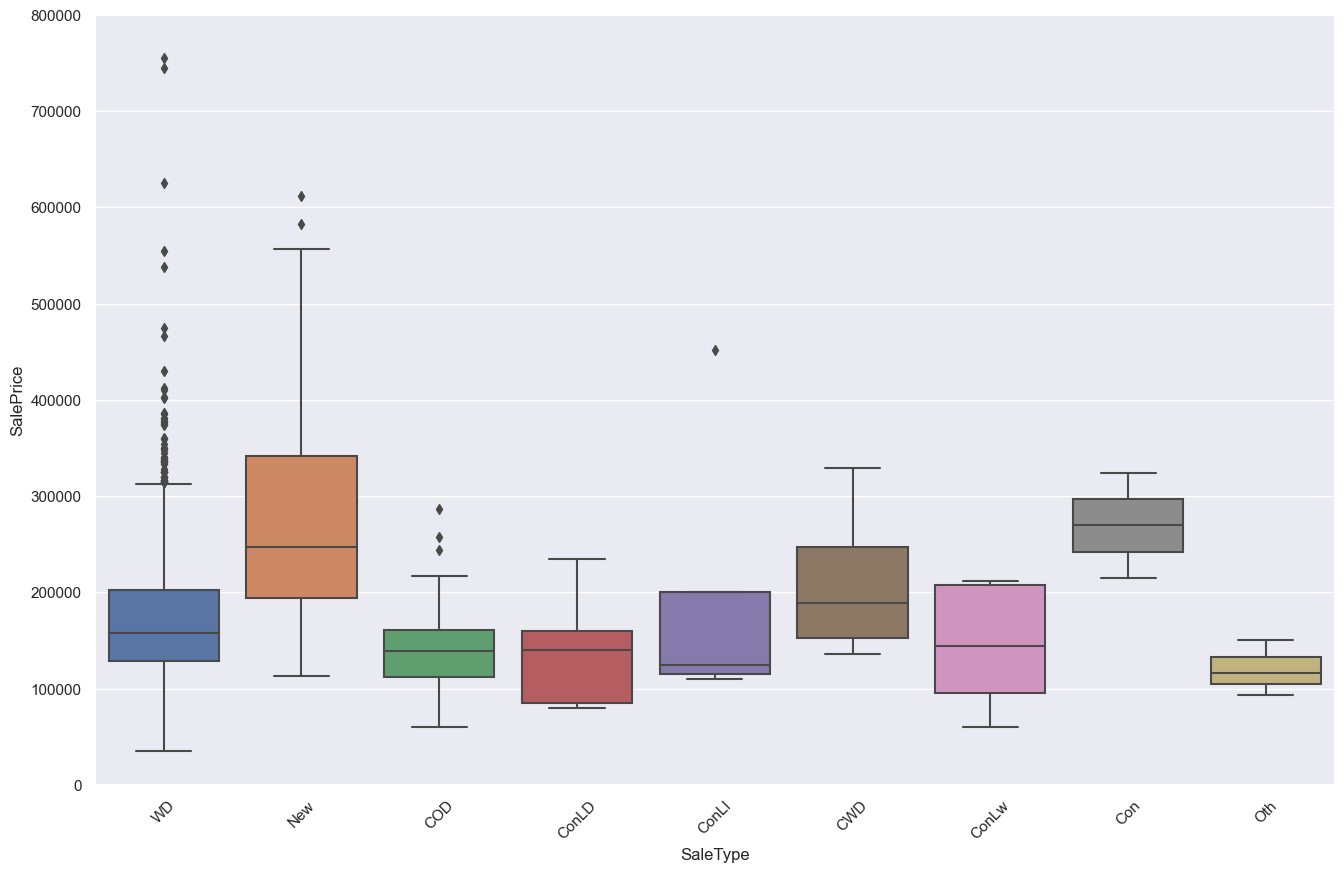

In [21]:
ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType',y ='SalePrice',data = data)
fig.axis(ymin=0,ymax=800000);
xt = plt.xticks(rotation = 45)


# Remove Outliers 

In [22]:
 data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

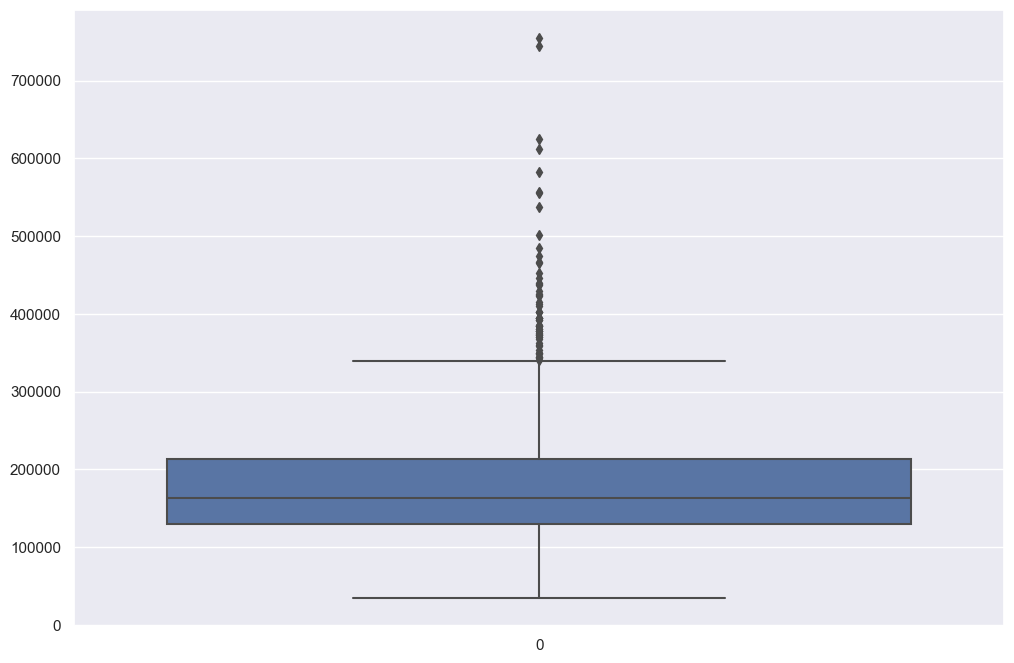

In [23]:
sns.boxplot(data['SalePrice'])

In [24]:
data.shape

(1460, 81)

In [25]:
first_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [26]:
new_boundary = third_quartile + 3*IQR

In [27]:
data.drop(data[data['SalePrice']>new_boundary].index,axis =0,inplace = True)

In [28]:
data.shape

(1448, 81)

<Axes: >

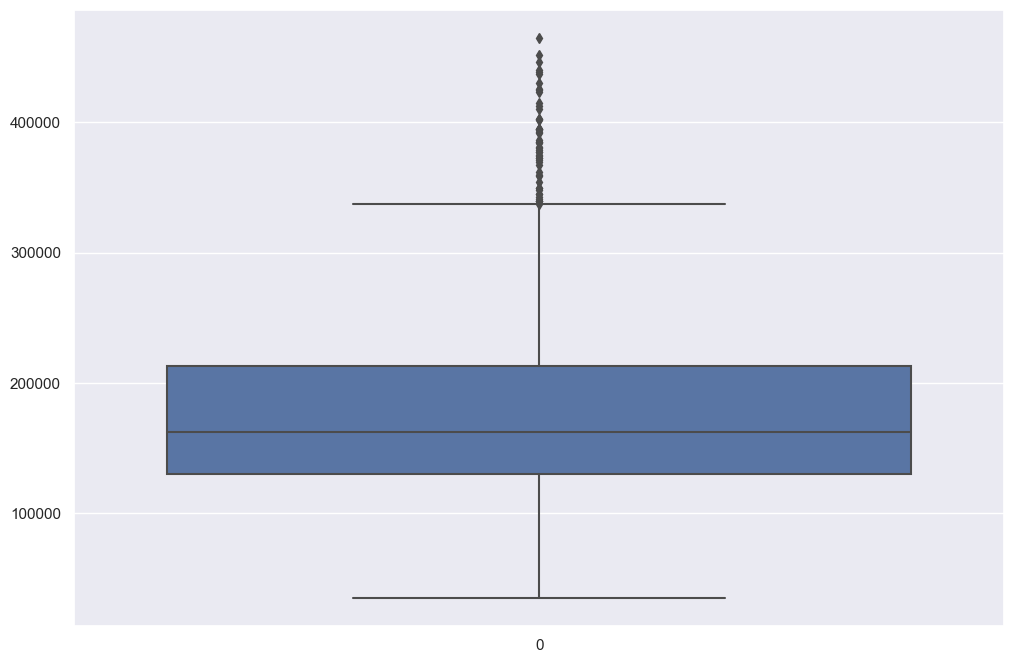

In [29]:
sns.boxplot(data['SalePrice'])

# Remove Bad Features

In [30]:
data.isnull().sum().head(80)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1357
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        870
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [31]:
#Drop the colomns


In [32]:
# जो कॉलम्स DataFrame में नहीं हैं उन्हें हटाने के लिए
cols_to_remove = ["BsmtFinSF1","LotFrontage","WoodDeckSF","ndFlrSF","OpenPorchSF","HalfBath","LotArea", "BsmtFullBath","BsmtUnfSF",
                  "BedroomAbvGr","ScreenPorch","PoolArea","MoSold","SsnPorch","BsmtFinSF2","BsmtHalfBath","MiscVal","Id","LowQualFinSF",
                  "YrSold","OverallCond","MSSubClass","EnclosedPorch","KitchenAbvGr","FireplaceQu","Fence","Alley","MiscFeature","PoolQC",
                  "GarageCars","lstFlrSF" ,"GrLivArea","FullBath"]
# जो कॉलम्स वास्तव में DataFrame में हैं उन्हें फ़िल्टर करें
existing_cols_to_remove = [col for col in cols_to_remove if col in data.columns]

# कॉलम्स ड्रॉप करें
data = data.drop(existing_cols_to_remove, axis=1)

# ड्रॉप किए गए कॉलम्स की पुष्टि के लिए
print(f"Dropped columns: {existing_cols_to_remove}")
print(f"Remaining columns: {data.columns}")


Dropped columns: ['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'GarageCars', 'GrLivArea', 'FullBath']
Remaining columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'TotRmsAb

In [33]:
data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1        NaN         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3        NaN         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC  \
0           No          GLQ          Unf          856    GasA        Ex   
1           Gd          ALQ          Unf         1262    GasA        Ex   
2           Mn          GLQ          Unf          920    GasA        Ex   
3           No          ALQ          Unf          756    GasA        Gd   
4           Av          GLQ          Unf         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF KitchenQual  TotRmsAbvGrd  \
0          Y      SBrkr       856       854          Gd             8   
1          Y      SBrkr      1262         0          TA             6   
2          Y      SBrkr       920       866          Gd             6   
3          Y      SBrkr       961       756          Gd             7   
4          Y      SBrkr      1145      1053          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageArea  \
0        Typ           0     Attchd       2003.0          RFn         548   
1        Typ           1     Attchd       1976.0          RFn         460   
2        Typ           1     Attchd       2001.0          RFn         608   
3        Typ           1     Detchd       1998.0          Unf         642   
4        Typ           1     Attchd       2000.0          RFn         836   

  GarageQual GarageCond PavedDrive  3SsnPorch SaleType SaleCondition  \
0         TA         TA          Y          0       WD        Normal   
1         TA         TA          Y          0       WD        Normal   
2         TA         TA          Y          0       WD        Normal   
3         TA         TA          Y          0       WD       Abnorml   
4         TA         TA          Y          0       WD        Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [34]:
data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1        NaN         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3        NaN         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC  \
0           No          GLQ          Unf          856    GasA        Ex   
1           Gd          ALQ          Unf         1262    GasA        Ex   
2           Mn          GLQ          Unf          920    GasA        Ex   
3           No          ALQ          Unf          756    GasA        Gd   
4           Av          GLQ          Unf         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF KitchenQual  TotRmsAbvGrd  \
0          Y      SBrkr       856       854          Gd             8   
1          Y      SBrkr      1262         0          TA             6   
2          Y      SBrkr       920       866          Gd             6   
3          Y      SBrkr       961       756          Gd             7   
4          Y      SBrkr      1145      1053          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageArea  \
0        Typ           0     Attchd       2003.0          RFn         548   
1        Typ           1     Attchd       1976.0          RFn         460   
2        Typ           1     Attchd       2001.0          RFn         608   
3        Typ           1     Detchd       1998.0          Unf         642   
4        Typ           1     Attchd       2000.0          RFn         836   

  GarageQual GarageCond PavedDrive  3SsnPorch SaleType SaleCondition  \
0         TA         TA          Y          0       WD        Normal   
1         TA         TA          Y          0       WD        Normal   
2         TA         TA          Y          0       WD        Normal   
3         TA         TA          Y          0       WD       Abnorml   
4         TA         TA          Y          0       WD        Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [35]:
data.shape

(1448, 51)

In [36]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [37]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [38]:
for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

In [39]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [40]:
data.head(100)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0          3       1         0            1          1          0          0   
1          3       1         0            1          1          2          0   
2          3       1         1            1          1          0          0   
3          3       1         1            1          1          1          0   
4          3       1         1            1          1          2          0   
5          3       1         1            1          1          0          0   
6          3       1         0            1          1          0          0   
7          3       1         1            1          1          1          0   
8          1       1         0            1          1          0          0   
9          3       1         0            1          1          1          0   
10         3       1         0            1          1          0          0   
11         3       1         1            1          1          0          0   
12         3       1         3            1          1          0          0   
13         3       1         1            1          1          0          0   
14         3       1         1            1          1          1          0   
15         1       1         0            1          1          1          0   
16         3       1         1            1          1          4          0   
17         3       1         0            1          1          0          0   
18         3       1         0            1          1          0          0   
19         3       1         0            1          1          0          0   
20         3       1         1            1          1          1          0   
21         1       1         0            0          1          0          0   
22         3       1         0            1          1          0          0   
23         1       1         0            1          1          0          0   
24         3       1         1            1          1          0          0   
25         3       1         0            1          1          1          0   
26         3       1         0            1          1          1          0   
27         3       1         0            1          1          0          0   
28         3       1         1            1          1          4          0   
29         1       1         1            1          1          0          0   
30         0       1         0            1          1          0          0   
31         3       1         1            1          1          4          0   
32         3       1         0            1          1          1          0   
33         3       1         1            1          1          0          0   
34         3       1         0            1          1          0          0   
35         3       1         0            1          1          0          0   
36         3       1         0            1          1          1          0   
37         3       1         0            1          1          0          0   
38         3       1         0            1          1          0          0   
39         3       1         0            1          1          0          0   
40         3       1         0            1          1          0          0   
41         3       1         0            1          1          0          0   
42         3       1         1            1          1          4          0   
43         3       1         1            1          1          4          0   
44         3       1         0            1          1          0          0   
45         3       1         0            1          1          0          0   
46         3       1         1            1          1          4          0   
47         4       1         0            1          1          0          0   
48         1       1         0            1          1          0          0   
49  

In [41]:
data.shape

(1448, 51)

In [42]:
scaling_feature=[feature for feature in data.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

51

In [43]:
scaling_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [44]:
data.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         0            1          1          0          0   
1         3       1         0            1          1          2          0   
2         3       1         1            1          1          0          0   
3         3       1         1            1          1          1          0   
4         3       1         1            1          1          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0            15           2           1         3           5            7   
1            12           1           1         3           4            6   
2            15           2           1         3           5            7   
3            16           2           1         3           5            7   
4            21           2           1         3           5            8   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0       2003          2003          0         0            9            9   
1       1976          1976          0         0            2            2   
2       2001          2002          0         0            9            9   
3       1915          1970          0         0            1            3   
4       2000          2000          0         0            9            9   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           2       196.0          2          3           4         3   
1           1         0.0          1          3           2         3   
2           2       162.0          2          3           4         3   
3           1         0.0          1          3           1         2   
4           2       350.0          2          3           4         3   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  Heating  \
0         2             1             6             4          856        2   
1         2             4             4             4         1262        2   
2         2             2             6             4          920        2   
3         3             1             4             4          756        2   
4         2             3             6             4         1145        2   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  KitchenQual  \
0          4           1           3       856       854            2   
1          4           1           3      1262         0            1   
2          4           1           3       920       866            2   
3          3           1           3       961       756            2   
4          4           1           3      1145      1053            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  \
0             8           3           0           3       2003.0   
1             6           3           1           3       1976.0   
2             6           3           1           3       2001.0   
3             7           3           1           1       1998.0   
4             9           3           1           3       2000.0   

   GarageFinish  GarageArea  GarageQual  GarageCond  PavedDrive  3SsnPorch  \
0             2         548           2           2           2          0   
1             2         460           2           2           2          0   
2             2         608           2           2           2          0   
3             1         642           2           2           2          0   
4             2         836           2           2           2          0   

   SaleType  SaleCondition  SalePrice  
0         2              3     208500  
1         2              3     181500  
2         2              3     223500  
3         2              0     140000  
4         2              3     250000

In [45]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [46]:
scaler.transform(data[feature_scale])

array([[0.75      , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.75      ],
       [0.75      , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.75      ],
       [0.75      , 1.        , 0.33333333, ..., 0.        , 0.66666667,
        0.75      ],
       ...,
       [0.75      , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.75      ],
       [0.75      , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.75      ],
       [0.75      , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.75      ]])

In [47]:
data1 = pd.concat([data[[ 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [48]:
data1.head()

SalePrice  MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0     208500      0.75     1.0  0.000000     0.333333        1.0       0.00   
1     181500      0.75     1.0  0.000000     0.333333        1.0       0.50   
2     223500      0.75     1.0  0.333333     0.333333        1.0       0.00   
3     140000      0.75     1.0  0.333333     0.333333        1.0       0.25   
4     250000      0.75     1.0  0.333333     0.333333        1.0       0.50   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0        0.0      0.681818         0.4         1.0      0.75         1.0   
1        0.0      0.545455         0.2         1.0      0.75         0.8   
2        0.0      0.681818         0.4         1.0      0.75         1.0   
3        0.0      0.727273         0.4         1.0      0.75         1.0   
4        0.0      0.954545         0.4         1.0      0.75         1.0   

   OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0     0.666667   0.949275      0.883333        0.0       0.0          0.9   
1     0.555556   0.753623      0.433333        0.0       0.0          0.2   
2     0.666667   0.934783      0.866667        0.0       0.0          0.9   
3     0.666667   0.311594      0.333333        0.0       0.0          0.1   
4     0.777778   0.927536      0.833333        0.0       0.0          0.9   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          0.9    0.666667     0.12250   0.666667        1.0        1.00   
1          0.2    0.333333     0.00000   0.333333        1.0        0.50   
2          0.9    0.666667     0.10125   0.666667        1.0        1.00   
3          0.3    0.333333     0.00000   0.333333        1.0        0.25   
4          0.9    0.666667     0.21875   0.666667        1.0        1.00   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  \
0      0.75  0.666667          0.25      1.000000           0.8     0.140098   
1      0.75  0.666667          1.00      0.666667           0.8     0.206547   
2      0.75  0.666667          0.50      1.000000           0.8     0.150573   
3      0.50  1.000000          0.25      0.666667           0.8     0.123732   
4      0.75  0.666667          0.75      1.000000           0.8     0.187398   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      1.0       1.00         1.0         1.0  0.119780  0.469747   
1      1.0       1.00         1.0         1.0  0.212942  0.000000   
2      1.0       1.00         1.0         1.0  0.134465  0.476348   
3      1.0       0.75         1.0         1.0  0.143873  0.415842   
4      1.0       1.00         1.0         1.0  0.186095  0.579208   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  \
0     0.666667      0.500000         1.0    0.000000        0.75     0.936364   
1     0.333333      0.333333         1.0    0.333333        0.75     0.690909   
2     0.666667      0.333333         1.0    0.333333        0.75     0.918182   
3     0.666667      0.416667         1.0    0.333333        0.25     0.890909   
4     0.666667      0.583333         1.0    0.333333        0.75     0.909091   

   GarageFinish  GarageArea  GarageQual  GarageCond  PavedDrive  3SsnPorch  \
0      0.666667    0.386460         1.0         1.0         1.0        0.0   
1      0.666667    0.324401         1.0         1.0         1.0        0.0   
2      0.666667    0.428773         1.0         1.0         1.0        0.0   
3      0.333333    0.452750         1.0         1.0         1.0        0.0   
4      0.666667    0.589563         1.0         1.0         1.0        0.0   

   SaleType  SaleCondition  
0  0.666667           0.75  
1  0.666667           0.75  
2  0.666667           0.75  
3  0.666667           0.00  
4  0.666667           0.75

In [49]:
data1.shape

(1448, 51)

In [50]:
data1.drop(['GarageYrBlt'],axis=1,inplace=True)


In [51]:
X = data1.drop(columns=["SalePrice"],axis=1)

In [52]:
y = data1["SalePrice"]

## Spliting The Train Test Data

In [53]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [54]:
X_train.shape

(1158, 49)

In [55]:
X_train

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
478       0.75     1.0  0.333333     1.000000        1.0       0.00   
1433      0.75     1.0  0.000000     0.333333        1.0       0.00   
380       0.75     1.0  0.333333     0.333333        1.0       0.00   
1091      0.75     1.0  0.000000     0.000000        1.0       0.00   
1127      0.75     1.0  0.000000     0.333333        1.0       0.00   
1410      0.25     1.0  0.000000     0.333333        1.0       0.00   
221       0.75     1.0  0.000000     0.333333        1.0       0.50   
113       0.75     1.0  0.000000     0.000000        1.0       0.25   
1269      0.75     1.0  0.333333     0.333333        1.0       0.00   
770       0.25     1.0  0.000000     0.333333        1.0       0.50   
174       0.75     1.0  0.333333     0.333333        1.0       0.00   
987       0.75     1.0  0.333333     0.333333        1.0       0.00   
382       0.75     1.0  1.000000     0.666667        1.0       0.25   
1196      0.75     1.0  0.000000     0.333333        1.0       0.00   
945       0.75     1.0  0.333333     0.333333        1.0       0.00   
916       0.75     1.0  0.000000     0.333333        1.0       0.00   
873       0.75     1.0  0.000000     0.333333        1.0       0.00   
809       0.75     1.0  0.333333     0.333333        1.0       0.25   
1041      0.75     1.0  0.333333     0.333333        1.0       0.00   
1155      0.75     1.0  0.333333     0.333333        1.0       0.50   
31        0.75     1.0  0.333333     0.333333        1.0       1.00   
210       1.00     1.0  0.000000     0.333333        1.0       0.00   
904       0.25     1.0  0.000000     0.333333        1.0       0.00   
1399      0.75     1.0  0.000000     0.333333        1.0       0.00   
754       1.00     1.0  0.000000     0.333333        1.0       0.00   
423       0.25     1.0  0.000000     1.000000        1.0       0.00   
1026      0.75     1.0  0.000000     0.000000        1.0       0.00   
188       0.75     1.0  0.000000     0.000000        1.0       0.00   
377       0.75     1.0  0.333333     0.333333        1.0       0.00   
429       0.25     1.0  0.333333     0.000000        1.0       0.00   
649       0.75     1.0  0.000000     0.333333        1.0       0.00   
398       0.75     1.0  1.000000     0.333333        1.0       0.00   
83        0.75     1.0  0.333333     0.333333        1.0       0.00   
48        0.25     1.0  0.000000     0.333333        1.0       0.00   
155       0.75     1.0  0.000000     0.333333        1.0       0.25   
506       0.75     1.0  0.000000     0.333333        1.0       0.25   
1102      0.75     1.0  0.000000     0.333333        1.0       0.00   
346       0.75     1.0  0.000000     0.333333        1.0       0.00   
1013      0.75     1.0  0.000000     0.333333        1.0       0.00   
752       0.75     1.0  0.333333     0.333333        1.0       0.00   
1188      0.75     1.0  0.000000     0.333333        1.0       0.00   
1177      0.75     1.0  0.333333     0.333333        1.0       0.00   
179       1.00     1.0  0.000000     0.333333        1.0       0.00   
344       0.75     1.0  0.333333     0.333333        1.0       1.00   
1203      0.75     1.0  0.333333     0.333333        1.0       0.00   
909       0.75     1.0  0.000000     0.333333        1.0       0.00   
844       0.75     1.0  0.000000     0.333333        1.0       0.00   
1138      0.75     1.0  0.000000     0.000000        1.0       0.00   
1270      0.75     1.0  0.333333     0.333333        1.0       1.00   
1156      0.75     1.0  0.333333     0.333333        1.0       0.00   
615       0.75     1.0  0.000000     0.333333        1.0       0.00   
428       0.25     1.0  0.000000     0.333333        1.0       0.00   
552       0.25     1.0  0.000000     0.333333        1.0       0.00   
1280      0.25     1.0  0.000000     0.333333        1.0       0.00   
591       0.75     1.0  0.333333     0.333333        1.0       0.00   
243       0.75     1.0  0.0000

In [56]:
X_train.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
3SsnPorch        0
SaleType         0
SaleCondition    0
dtype: int64

In [57]:
y_test.shape

(290,)

# RandomForest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor


In [59]:
model = RandomForestRegressor()


In [60]:
model.fit(X_train, y_train)


RandomForestRegressor()

In [62]:
predictions = model.predict(x_test)


In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


In [64]:
mse

585592748.3999897

In [65]:
r2

0.8321439184648362

In [66]:
mae

16374.653853448275

In [68]:
from sklearn.ensemble import RandomForestRegressor
model.fit(X_train, y_train)
y_pred = model.predict(x_test)


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 586466518.6036459
R-squared: 0.8318934583234688


In [71]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Sample data generation (you can replace this with your actual data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model object
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4.173733526278071
R-squared: 0.9295849975491168


# Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating a Ridge regression model
ridge_model = Ridge()

# Defining a parameter grid for grid search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Performing grid search to find the best alpha
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Getting the best model and making predictions
best_ridge_model = grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculating MSE and R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Printing results
print(f"Mean Squared Error after Ridge regularization: {mse_ridge}")
print(f"R-squared after Ridge regularization: {r2_ridge}")


Mean Squared Error after Ridge regularization: 4.174253729093846
R-squared after Ridge regularization: 0.9295762212143754


# XGBoost

In [ ]:
import xgboost as xgb

# Creating an XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculating MSE and R-squared
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Printing results
print(f"Mean Squared Error after XGBoost: {mse_xgb}")
print(f"R-squared after XGBoost: {r2_xgb}")


# Support Vector Machine

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assume X and y are your features and target variable
# Example data generation (replace with your actual data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Training the SVR model
svr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = svr_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Svm

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Calculate MSE and R-squared
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Print results
print(f"Mean Squared Error after XGBoost (tuned): {mse_xgb_tuned}")
print(f"R-squared after XGBoost (tuned): {r2_xgb_tuned}")


# checking mean_squared_error, r2_score

In [ ]:
# Assuming you have already trained your model and have predictions
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# predicted Line

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation (replace with your actual data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

# Assume you have already trained your model and made predictions
# Let's create some example predictions for demonstration
y_pred = 2.8 * X.squeeze()

# Plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')

# Plotting the predicted line
plt.plot(X.squeeze(), y_pred, color='red', linewidth=2, label='Predicted line')

plt.title('Actual vs. Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Random forest Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest regressor
rf_model = RandomForestRegressor()

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Calculate MSE and R-squared
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Print results
print(f"Mean Squared Error after Random Forest (tuned): {mse_rf_tuned}")
print(f"R-squared after Random Forest (tuned): {r2_rf_tuned}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For demonstration, let's create a simple dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

# Convert to DataFrame for consistency with the rest of your workflow
df = pd.DataFrame({'X': X.squeeze(), 'SalePrice': y})

# Define features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# Split the data into training and testing sets


# . Expected Benefits
1.Accuracy: Improved prediction accuracy compared to traditional methods, leading to better pricing strategies.

2.Efficiency: Automated price estimation reduces the time and effort required for manual appraisals.

3.Competitive Advantage: Enhanced pricing accuracy provides a competitive edge in the real estate market.

4.Informed Decision Making: Better data-driven insights for buyers, sellers, and investors.

# Implementation Plan
Phase 1: Data Preparation

Collect and preprocess historical real estate data.
Perform exploratory data analysis to understand feature importance.

Phase 2: Model Development
Train the SVR model on preprocessed data.
Tune hyperparameters using grid search or random search for optimal performance.

Phase 3: Model Evaluation
Validate the model using cross-validation techniques.
Compare performance with baseline models (e.g., linear regression).

Phase 4: Deployment and Monitoring
Integrate the model into the existing workflow for real-time predictions.
Continuously monitor model performance and retrain as necessary with new data.


# Conclusion


# Linear Regression:
Simple and interpretable.

Good for understanding basic relationships between features and target variable.

Limited in capturing non-linear relationships.

# Random Forest:

Reduces overfitting by averaging multiple decision trees.

Robust and provides feature importance.

Computationally intensive